<h1 style="font-size: 40px; margin-bottom: 0px;">5.1 Image analysis in Python Part II</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 700px;"></hr>

Today, we'll be continuing with some image analysis to see if we can update our function from last week in order to use it to analyze a series of nuclear YAP intensities at once. This will require an additional package that will let us navigate directories while in our Python notebook. Once we load in our images, we'll work through how to update our function from last week, where we analyzed just a single field of view, to one where we can analyze all our images.

<strong>Learning objectives:</strong>
<ul>
    <li>Practice navigating directories while working in a Python notebook</li>
    <li>Learn how to load in multiple files for simultaneous processing</li>
    <li>Set up a pipeline to analyze multiple images at once</li>
    <li>Continue using for loops and functions for image analysis</li>
</ul>

Packages that we'll use today are:
<ul>
    <li>numpy</li>
    <li>pandas</li>
    <li>matplotlib.pyplot</li>
    <li>skimage.measure</li>
    <li>seaborn</li>
    <li>scipy.stats</li>
    <li>scipy.ndimage</li>
    <li>os</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.measure
from skimage.color import label2rgb
import seaborn as sns
import scipy.stats as stats
import scipy.ndimage as ndi
import os

<h1 style="font-size: 40px; margin-bottom: 0px;">Navigating directories</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

Today, you will learn to make use of the <mark style="background-color: #EEEEEE;"><strong>os</strong></mark> module in order to use operating system functionalities, such as changing directories. This module allows you to find files that you want to pull into Python, so you can load in multiple files at once for analysis. In our case, we will be using functions contained in this module to load in all our image files.

<h2>Identify current working directory</h2>

First, let's take a look at our current working directory by using the <mark style="background-color: #EEEEEE;"><strong>os.getcwd()</strong></mark> function. <a href="https://docs.python.org/3/library/os.html#os.getcwd" rel="noopener noreferrer" target="_blank"><u>Documentation is here.</u></a>

In [2]:
os.getcwd()

'/home/jovyan/MCB201B_F2024/Week_5'

You can see that the <mark style="background-color: #EEEEEE;"><strong>os.getcwd()</strong></mark> function outputs to us the path to our current working directory, and by default, our working directory will be the folder that contains our Python notebook.

But what data type are we getting as an output?

In [3]:
type(os.getcwd())

str

You can see that we're getting a string data type as an output that contains the file path information to our current working directory. Recall that we can make use of the <mark style="background-color: #EEEEEE;"><strong>&plus;</strong></mark> operator to concatenate two strings together. What this means is that we can specify subdirectories or add onto the file path by combining the <mark style="background-color: #EEEEEE;"><strong>os.getcwd()</strong></mark> and a string that specifies the subdirectory that we want to go into.
```
os.getcwd()+'/images/'
```

In [5]:
os.getcwd()+'/images/'

'/home/jovyan/MCB201B_F2024/Week_5/blah blah blah/'

<h2>Change directories</h2>

We can also change what folder we're working in by using the <mark style="background-color: #EEEEEE;"><strong>os.chdir()</strong></mark> function. <a href="https://docs.python.org/3/library/os.html#os.chdir" rel="noopener noreferrer" target="_blank"><u>Documentation is here.</a></u>

To reduce how much we need to type, we can use the <mark style="background-color: #EEEEEE;"><strong>os.getcwd()</strong></mark> function to get the file path to this week's directory and just add on the subdirectory information.
```
os.chdir(os.getcwd()+'/images/')
```

In [6]:
os.chdir(os.getcwd()+'/images/')

Now let's see what our current working directory is:

In [7]:
os.getcwd()

'/home/jovyan/MCB201B_F2024/Week_5/images'

You should be able to see now that our current working directory has been updated to be the **images** folder contained within this week's directory.

<h2>Get the names of files and folders in a directory</h2>

Now that we're in a directory that we want to work in, we can take a look at what's containined within it by using the <mark style="background-color: #EEEEEE;"><strong>os.listdir()</strong></mark> function. <a href="https://docs.python.org/3/library/os.html#os.listdir" rel="noopener noreferrer" target="_blank"><u>Documentation is here.</u></a>
```
os.listdir()
```

In [8]:
os.listdir()

['.gitkeep', 'dapi', 'yap']

You should be able to see that the output contains the folders for this week's images that we'll be analyzing. Specifically, the **bacteria**, **dapi**, and **yap** folders, as well as a hidden file **.ipynb_checkpoints**.

If we want to find the files contained within those subdirectories, we can either change our working directory, or we can add onto our current working directory file path.
```
os.listdir(os.getcwd()+'/dapi/no_serum/')
```

While you can change your current working directory, sometimes it's more convenient to stay in a parent directory, so you can pull all your files without having to keep changing directories beforehand.

In [9]:
os.listdir(os.getcwd()+'/dapi/no_serum/')

['no_serum_dapi_4.tiff',
 'no_serum_dapi_2.tiff',
 'no_serum_dapi_5.tiff',
 '.gitkeep',
 'no_serum_dapi_1.tiff',
 'no_serum_dapi_3.tiff']

<h3>Sort file names</h3>

What you should see now is a list containing all the file names for our no serum DAPI images that we want to analyze, but they are sorted in an arbitrary order, which means that if we want to match up our DAPI and our YAP images, we'll need to make sure that they are sorted properly by making use of the <mark style="background-color: #EEEEEE;"><strong>list.sort()</strong></mark> function. <a href="https://docs.python.org/3/library/stdtypes.html#list.sort" rel="noopener noreferrer" target="_blank"><u>Documentation is here.</u></a>
```
ns_dapi_files = os.listdir(os.getcwd()+'/dapi/no_serum/')
ns_dapi_files.sort()
```

In [12]:
ns_dapi_files = os.listdir(os.getcwd()+'/dapi/no_serum/')
ns_dapi_files.sort()
print(ns_dapi_files)
ns_dapi_files = ns_dapi_files[1:6]
print(ns_dapi_files)

['.gitkeep', 'no_serum_dapi_1.tiff', 'no_serum_dapi_2.tiff', 'no_serum_dapi_3.tiff', 'no_serum_dapi_4.tiff', 'no_serum_dapi_5.tiff']
['no_serum_dapi_1.tiff', 'no_serum_dapi_2.tiff', 'no_serum_dapi_3.tiff', 'no_serum_dapi_4.tiff', 'no_serum_dapi_5.tiff']


Now that our file names are sorted properly, let's do the same for our no serum YAP images to see if they end up in the same order as our no serum DAPI images.
```
ns_yap_files = os.listdir(os.getcwd()+'/yap/no_serum/')
ns_yap_files.sort()
```

In [15]:
ns_yap_files = os.listdir(os.getcwd()+'/yap/no_serum/')
ns_yap_files.sort()
print(ns_yap_files)
ns_yap_files = ns_yap_files[1:6]
print(ns_yap_files)

['.gitkeep', 'no_serum_yap_1.tiff', 'no_serum_yap_2.tiff', 'no_serum_yap_3.tiff', 'no_serum_yap_4.tiff', 'no_serum_yap_5.tiff']
['no_serum_yap_1.tiff', 'no_serum_yap_2.tiff', 'no_serum_yap_3.tiff', 'no_serum_yap_4.tiff', 'no_serum_yap_5.tiff']


In [16]:
%ls

dapi/  yap/


<h1 style="font-size: 40px; margin-bottom: 0px;">Load multiple files</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

So what we have now is a list of our files nicely sorted, which means that we can make use of for loops to load in all our files.

Let's set up a for loop that will simultaneously and pull in our DAPI and YAP images to their own respective lists.

<h2>Iterate through a list of tuples containing paired/grouped files</h2>

We can set up our for loop to loop through two lists simultaneously by giving it a list of tuples containing the elements of both lists paired together. To do this, we make use of the <mark style="background-color: #EEEEEE;"><strong>zip()</strong></mark> function. <a href="https://docs.python.org/3/library/functions.html#zip" rel="noopener noreferrer" target="_blank"><u>Documentation is here.</u></a>

The <mark style="background-color: #EEEEEE;"><strong>zip()</strong></mark> function is essentially a for loop that goes through each element of the lists that you provide it, and it combines those elements into tuples.
```
zip(ns_dapi_files, ns_yap_files)
```

And if you want to take a look at how all the files of both lists are grouped up:
```
for object in zip(ns_dapi_files, ns_yap_files):
    print(object)
```

In [28]:
a = zip(ns_dapi_files, ns_yap_files)
print(a)

for object in a:
    print(object)


b, c = (1, 2)
print(b)
print(c)

('no_serum_dapi_1.tiff', 'no_serum_yap_1.tiff')
('no_serum_dapi_2.tiff', 'no_serum_yap_2.tiff')
('no_serum_dapi_3.tiff', 'no_serum_yap_3.tiff')
('no_serum_dapi_4.tiff', 'no_serum_yap_4.tiff')
('no_serum_dapi_5.tiff', 'no_serum_yap_5.tiff')
1
2


You can see that our DAPI file is paired up with its respective YAP file since we sorted both of them earlier when we pulled the file names, and each object is now a tuple data type, which means that we can unpack it by providing a variable for each element of the tuple. 
```
for file_name in zip(ns_dapi_files, ns_yap_files):
    blue, green = file_name
    print(blue)
    print(green)
```

In [22]:
for file_name in zip(ns_dapi_files, ns_yap_files):
    blue, green = file_name
    print(blue)
    print(green)

no_serum_dapi_1.tiff
no_serum_yap_1.tiff
no_serum_dapi_2.tiff
no_serum_yap_2.tiff
no_serum_dapi_3.tiff
no_serum_yap_3.tiff
no_serum_dapi_4.tiff
no_serum_yap_4.tiff
no_serum_dapi_5.tiff
no_serum_yap_5.tiff


Rather than specifying the tuple unpacking after we initiate the for loop, we can also provide two variables when we start up our for loop, and the tuple will be unpacked while iterating through our list of tuples.
```
for blue, green in zip(ns_dapi_files, ns_yap_files):
    print(blue)
    print(green)
```
So we'll get the same result as the previous example, but we condense the code.

In [23]:
for blue, green in zip(ns_dapi_files, ns_yap_files):
    print(blue)
    print(green)

no_serum_dapi_1.tiff
no_serum_yap_1.tiff
no_serum_dapi_2.tiff
no_serum_yap_2.tiff
no_serum_dapi_3.tiff
no_serum_yap_3.tiff
no_serum_dapi_4.tiff
no_serum_yap_4.tiff
no_serum_dapi_5.tiff
no_serum_yap_5.tiff


<h2>Load in both DAPI and YAP images simultaneously</h2>

We can use the same set up now to load in both our DAPI and YAP images simultaneously in a single for loop.
```
ns_dapi_images = []
ns_yap_images = []
for blue, green in zip(ns_dapi_files, ns_yap_files):
    dapi = plt.imread(f"dapi/no_serum/{blue}")
    yap = plt.imread(f"yap/no_serum/{green}")
    ns_dapi_images.append(dapi)
    ns_yap_images.append(yap)
```

In [29]:
os.getcwd()

'/home/jovyan/MCB201B_F2024/Week_5/images'

In [30]:
ns_dapi_images = []
ns_yap_images = []

for blue, green in zip(ns_dapi_files, ns_yap_files):
    dapi = plt.imread(f"dapi/no_serum/{blue}")
    yap = plt.imread(f"yap/no_serum/{green}")
    ns_dapi_images.append(dapi)
    ns_yap_images.append(yap)

In [31]:
print(ns_dapi_images)

[array([[42, 57, 46, ..., 62, 24, 17],
       [77, 53, 48, ..., 35, 69,  1],
       [78, 48, 13, ..., 22, 31, 54],
       ...,
       [37, 54, 60, ..., 68, 75, 46],
       [66, 34, 46, ..., 30, 71, 23],
       [36, 45, 70, ..., 50, 49, 21]], dtype=uint16), array([[ 54,  68,   9, ...,  82,  54,  66],
       [107,  80,  20, ...,  24,  32,  56],
       [ 71,  44,  58, ...,  65,  23,  64],
       ...,
       [ 86,  56,  96, ...,  23,  69,  51],
       [115,  50, 118, ...,  79,  56,  34],
       [104,  82,  63, ...,  41,  55,   0]], dtype=uint16), array([[ 85,  39,  60, ...,   7,  69,   9],
       [ 67,  41,  55, ...,  46,  66,  60],
       [ 32,  99,  39, ...,  28,  47,  42],
       ...,
       [ 64,  19,  68, ..., 120, 129, 141],
       [ 57,  38,  61, ..., 147, 130, 109],
       [ 79,  32,  55, ..., 101, 124, 131]], dtype=uint16), array([[853, 698, 810, ...,  16,  54,  38],
       [971, 771, 842, ...,  65,  23,  15],
       [971, 743, 735, ...,  13,  49,  35],
       ...,
       [ 72,   

Let's take a look at our images to see if they loaded in properly.

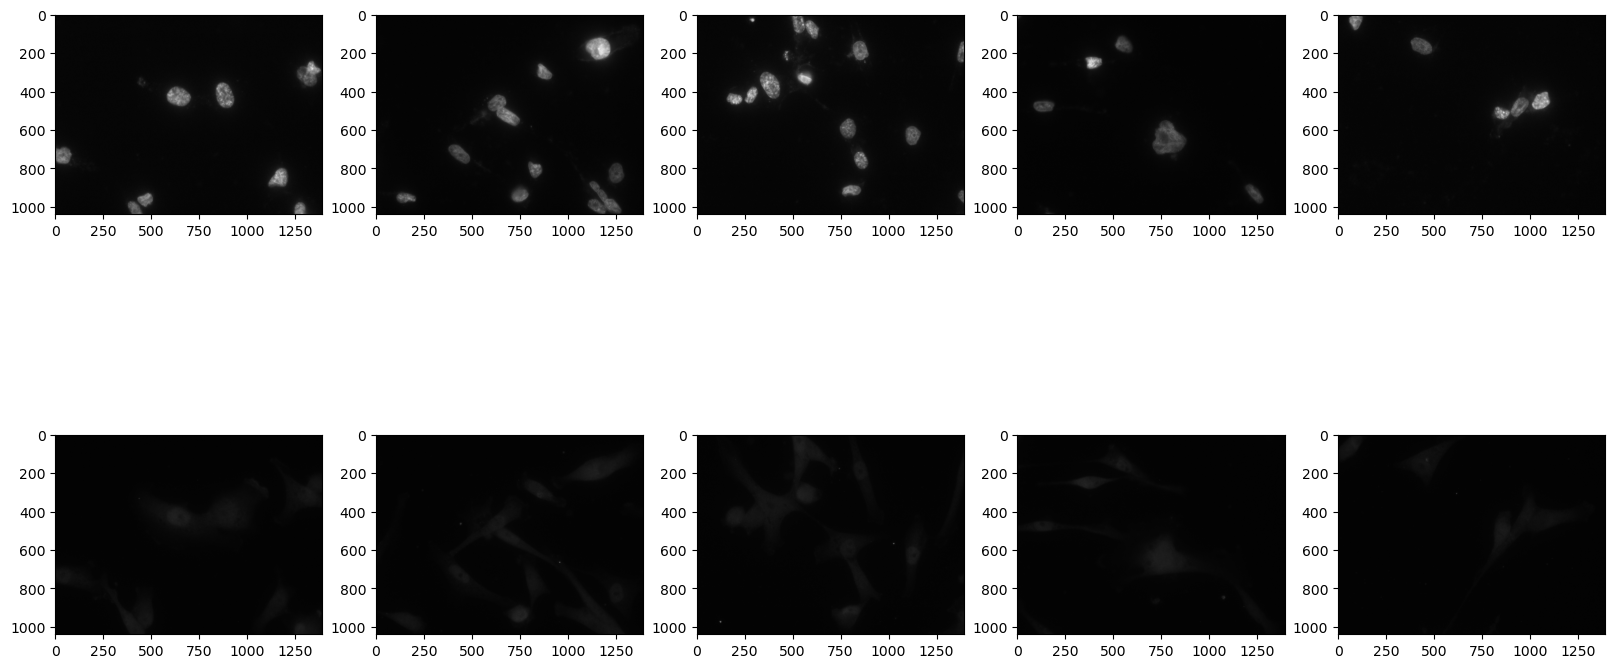

In [32]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

for i in np.arange(0, 5, 1):
    ax[0, i].imshow(ns_dapi_images[i], cmap='gray')
    ax[1, i].imshow(ns_yap_images[i], cmap='gray')

<h1 style="font-size: 40px; margin-bottom: 0px;">Process multiple images at once</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

So everything seems good, we have our DAPI and our YAP channels loaded in properly for each of our no serum fields of view. Let's then take our function from last week and bring it into this notebook, so we can make some slight modifications.

Let's update it so that we will generate the binary image within our function, so we don't have to generate a binary beforehand, and now we'll only need a single output since we're most interested in the mean nuclear intensity for each cell rather than an aggregate.

In [34]:
def mean_fluor(dapi_channel, yap_channel, threshold):
    """Calculating mean nuclear fluorescence"""
    #create a thresholded binary dapi image
    binary_image = dapi_channel > threshold

    #fill in our holes in the binary
    binary_image = ndi.binary_fill_holes(binary_image)
    
    #assign our YAP stain to a variable in the function to use later
    transcription_factor = yap_channel

    #Label our thresholded nuclei
    dapi_label_thresh, dapi_numbers = skimage.measure.label(binary_image, return_num=True)

    #get their properties
    nuc_props = skimage.measure.regionprops(dapi_label_thresh)

    #filter out the noise that we're not interested in
    areas = []
    for i in nuc_props:
        areas.append(i.area)

    #apply a conditional statement to remove noise
    nuc_filtered = np.zeros_like(dapi_label_thresh)
    for j in nuc_props:
        if j.area > 100:
            nuc_filtered = nuc_filtered + (dapi_label_thresh == j.label)

    #label our new filtered nuclei
    filtered_labels, filtered_numbers = skimage.measure.label(nuc_filtered, return_num=True)

    #group all our individual nuclei arrays into a single list
    all_nuclei = [np.zeros_like(filtered_labels)]*filtered_numbers
    for k in np.arange(0, filtered_numbers, 1):
        all_nuclei[k] = filtered_labels == k+1

    #measure mean fluorescence intensity
    mean_fluor_array = np.zeros(filtered_numbers)
    for l in np.arange(0, filtered_numbers, 1):
        fluorescence = transcription_factor*all_nuclei[l]
        mean_fluor_array[l] = np.sum(fluorescence)/np.sum(all_nuclei[l])
    
    return mean_fluor_array

Now that our function is defined, let's quickly take a look to see if we can find a good value for our threshold from all our DAPI images.
```
fig, ax = plt.subplots()

plt.ylim(0, 25000)

for im in ns_dapi_images:
    sns.histplot(im.flatten(), bins=50)
```

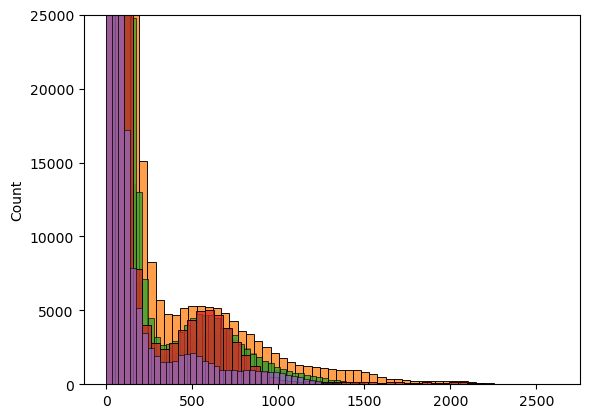

In [33]:
fig, ax = plt.subplots()
plt.ylim(0, 25000)

for im in ns_dapi_images:
    sns.histplot(im.flatten(), bins=50)

So it looks like the 400 threshold that we used last week should still work fine. Let's give our updated function a try with a single field of view.

In [36]:
testrun = mean_fluor(ns_dapi_images[0], ns_yap_images[0], 400)

print(testrun)

[308.93608324 302.42062473 417.83467699 299.12931618 238.53608402
 313.13952282 358.43002222 395.00754593]


Our function is able to output a list containing each cell's mean nuclear YAP fluorescence for us if we give it a single image. Now, we can make an additional modification so that our function will be able to loop through all our files and output all the mean nuclear intensities.

In [41]:
def big_mean_fluor(dapi_list, yap_list, threshold):
    """Calculating mean nuclear fluorescence"""
    #prepare an empty list to hold our data
    result = []

    for dapi_channel, yap_channel in zip(dapi_list, yap_list):
        #create a thresholded binary dapi image
        binary_image = dapi_channel > threshold
    
        #fill in our holes in the binary
        binary_image = ndi.binary_fill_holes(binary_image)
        
        #assign our YAP stain to a variable in the function to use later
        transcription_factor = yap_channel
    
        #Label our thresholded nuclei
        dapi_label_thresh, dapi_numbers = skimage.measure.label(binary_image, return_num=True)
    
        #get their properties
        nuc_props = skimage.measure.regionprops(dapi_label_thresh)
    
        #filter out the noise that we're not interested in
        areas = []
        for i in nuc_props:
            areas.append(i.area)
    
        #apply a conditional statement to remove noise
        nuc_filtered = np.zeros_like(dapi_label_thresh)
        for j in nuc_props:
            if j.area > 100:
                nuc_filtered = nuc_filtered + (dapi_label_thresh == j.label)
    
        #label our new filtered nuclei
        filtered_labels, filtered_numbers = skimage.measure.label(nuc_filtered, return_num=True)
    
        #group all our individual nuclei arrays into a single list
        all_nuclei = [np.zeros_like(filtered_labels)]*filtered_numbers
        for k in np.arange(0, filtered_numbers, 1):
            all_nuclei[k] = filtered_labels == k+1
    
        #measure mean fluorescence intensity
        mean_fluor_array = np.zeros(filtered_numbers)
        for l in np.arange(0, filtered_numbers, 1):
            fluorescence = transcription_factor*all_nuclei[l]
            mean_fluor_array[l] = np.sum(fluorescence)/np.sum(all_nuclei[l])

        #add our mean fluorescences into our results list
        result.extend(mean_fluor_array)
    
    return result

In [44]:
no_serum_result = big_mean_fluor(ns_dapi_images, ns_yap_images, 400)

print(no_serum_result)
print(type(no_serum_result))

[308.93608324043106, 302.4206247325631, 417.8346769859185, 299.12931618144887, 238.53608402100525, 313.13952282157675, 358.4300222151698, 395.00754593175856, 345.2075769534333, 324.910741301059, 325.94800030014255, 299.04533291358416, 255.06795669200645, 269.38832880961616, 275.9394878606745, 481.76675922253077, 285.6136133603239, 374.4637932795424, 111.1304347826087, 266.6278616658548, 214.14067744888618, 135.8583569405099, 392.0731651376147, 309.7821096378389, 300.75076530612245, 361.82419967444383, 297.41689623507807, 346.6310643098909, 274.1891482922611, 385.42757793764986, 287.8872964169381, 257.47849462365593, 322.60591031204797, 375.2057731958763, 305.04213600333753, 388.3270607991307, 199.8605, 315.1831986284595, 260.59871950164387, 237.75483675937122, 277.6566773934031]
<class 'list'>


Now rather than running the function for each image repeatedly, we can just call up the function once, and we can analyze multiple images and get a single list of each cell's mean nuclear YAP fluorescence intensity.

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #1: Update function to create basic analytical pipeline</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 1000px;"></hr>

Let's try to take what we've learned today to update our function so that all we need to do is change to our correct parent directory before we provide it with a string corresponding to the experimental condition and give it our desired threshold, and then Python can handle the rest.

In [50]:
def big_mean_fluor(condition, threshold):
    """Calculating mean nuclear fluorescence"""
    #find our files
    dapi_files_names = os.listdir(os.getcwd()+f"/dapi/{condition}/")
    yap_files_names = os.listdir(os.getcwd()+f"/yap/{condition}/")

    #sort our file names
    dapi_files_names.sort()
    yap_files_names.sort()

    #remove any unwanted files
    dapi_files_names = dapi_files_names[1:]
    yap_files_names = yap_files_names[1:]

    #load in our files using our list of file names
    dapi_list = []
    yap_list = []

    for blue, green in zip(dapi_files_names, yap_files_names):
        dapi = plt.imread(f"dapi/{condition}/{blue}")
        yap = plt.imread(f"yap/{condition}/{green}")
        dapi_list.append(dapi)
        yap_list.append(yap)
        
    #prepare an empty list to hold our data
    result = []

    for dapi_channel, yap_channel in zip(dapi_list, yap_list):
        #create a thresholded binary dapi image
        binary_image = dapi_channel > threshold
    
        #fill in our holes in the binary
        binary_image = ndi.binary_fill_holes(binary_image)
        
        #assign our YAP stain to a variable in the function to use later
        transcription_factor = yap_channel
    
        #Label our thresholded nuclei
        dapi_label_thresh, dapi_numbers = skimage.measure.label(binary_image, return_num=True)
    
        #get their properties
        nuc_props = skimage.measure.regionprops(dapi_label_thresh)
    
        #filter out the noise that we're not interested in
        areas = []
        for i in nuc_props:
            areas.append(i.area)
    
        #apply a conditional statement to remove noise
        nuc_filtered = np.zeros_like(dapi_label_thresh)
        for j in nuc_props:
            if j.area > 100:
                nuc_filtered = nuc_filtered + (dapi_label_thresh == j.label)
    
        #label our new filtered nuclei
        filtered_labels, filtered_numbers = skimage.measure.label(nuc_filtered, return_num=True)
    
        #group all our individual nuclei arrays into a single list
        all_nuclei = [np.zeros_like(filtered_labels)]*filtered_numbers
        for k in np.arange(0, filtered_numbers, 1):
            all_nuclei[k] = filtered_labels == k+1
    
        #measure mean fluorescence intensity
        mean_fluor_array = np.zeros(filtered_numbers)
        for l in np.arange(0, filtered_numbers, 1):
            fluorescence = transcription_factor*all_nuclei[l]
            mean_fluor_array[l] = np.sum(fluorescence)/np.sum(all_nuclei[l])

        #add our mean fluorescences into our results list
        result.extend(mean_fluor_array)
    
    return result

In [46]:
os.getcwd()

'/home/jovyan/MCB201B_F2024/Week_5/images'

In [51]:
no_serum_full_result = big_mean_fluor('no_serum', 400)
print(no_serum_full_result)

[308.93608324043106, 302.4206247325631, 417.8346769859185, 299.12931618144887, 238.53608402100525, 313.13952282157675, 358.4300222151698, 395.00754593175856, 345.2075769534333, 324.910741301059, 325.94800030014255, 299.04533291358416, 255.06795669200645, 269.38832880961616, 275.9394878606745, 481.76675922253077, 285.6136133603239, 374.4637932795424, 111.1304347826087, 266.6278616658548, 214.14067744888618, 135.8583569405099, 392.0731651376147, 309.7821096378389, 300.75076530612245, 361.82419967444383, 297.41689623507807, 346.6310643098909, 274.1891482922611, 385.42757793764986, 287.8872964169381, 257.47849462365593, 322.60591031204797, 375.2057731958763, 305.04213600333753, 388.3270607991307, 199.8605, 315.1831986284595, 260.59871950164387, 237.75483675937122, 277.6566773934031]


In [52]:
serum_full_result = big_mean_fluor('serum', 400)
print(serum_full_result)

[1031.4822359843547, 764.6842519065964, 637.4333576110706, 646.5702626880898, 417.33086534012034, 396.2821927888153, 627.8414138254614, 460.7975553857907, 380.02995966967546, 473.22875341219293, 506.2772277227723, 341.5212813620072, 672.6208053691275, 463.60065466448447, 575.8465539661898, 562.0967055132228, 312.51954204500595]


<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #2: Compare no serum vs serum</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 800px;"></hr>

Now with two lists of data containing our mean nuclear fluorescence intensities for our no serum and serum stimulated cells, let's calculate if there is a significant difference in the nuclear localization of YAP.

In [53]:
comparison = stats.ttest_ind(no_serum_full_result, serum_full_result, equal_var=False, nan_policy='omit')

comparison.pvalue

3.973702524385338e-05

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #3: Plot our results</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 800px;"></hr>

Let's take a look at how our results look like when plotted in a swarmplot with descriptive statistics overlaid on top of it.

In [58]:
full_results = pd.DataFrame({'no_serum': pd.Series(no_serum_full_result), 
                            'serum': pd.Series(serum_full_result)})
full_results.style

,no_serum,serum
0,308.936083,1031.482236
1,302.420625,764.684252
2,417.834677,637.433358
3,299.129316,646.570263
4,238.536084,417.330865
5,313.139523,396.282193
6,358.430022,627.841414
7,395.007546,460.797555
8,345.207577,380.029960
9,324.910741,473.228753


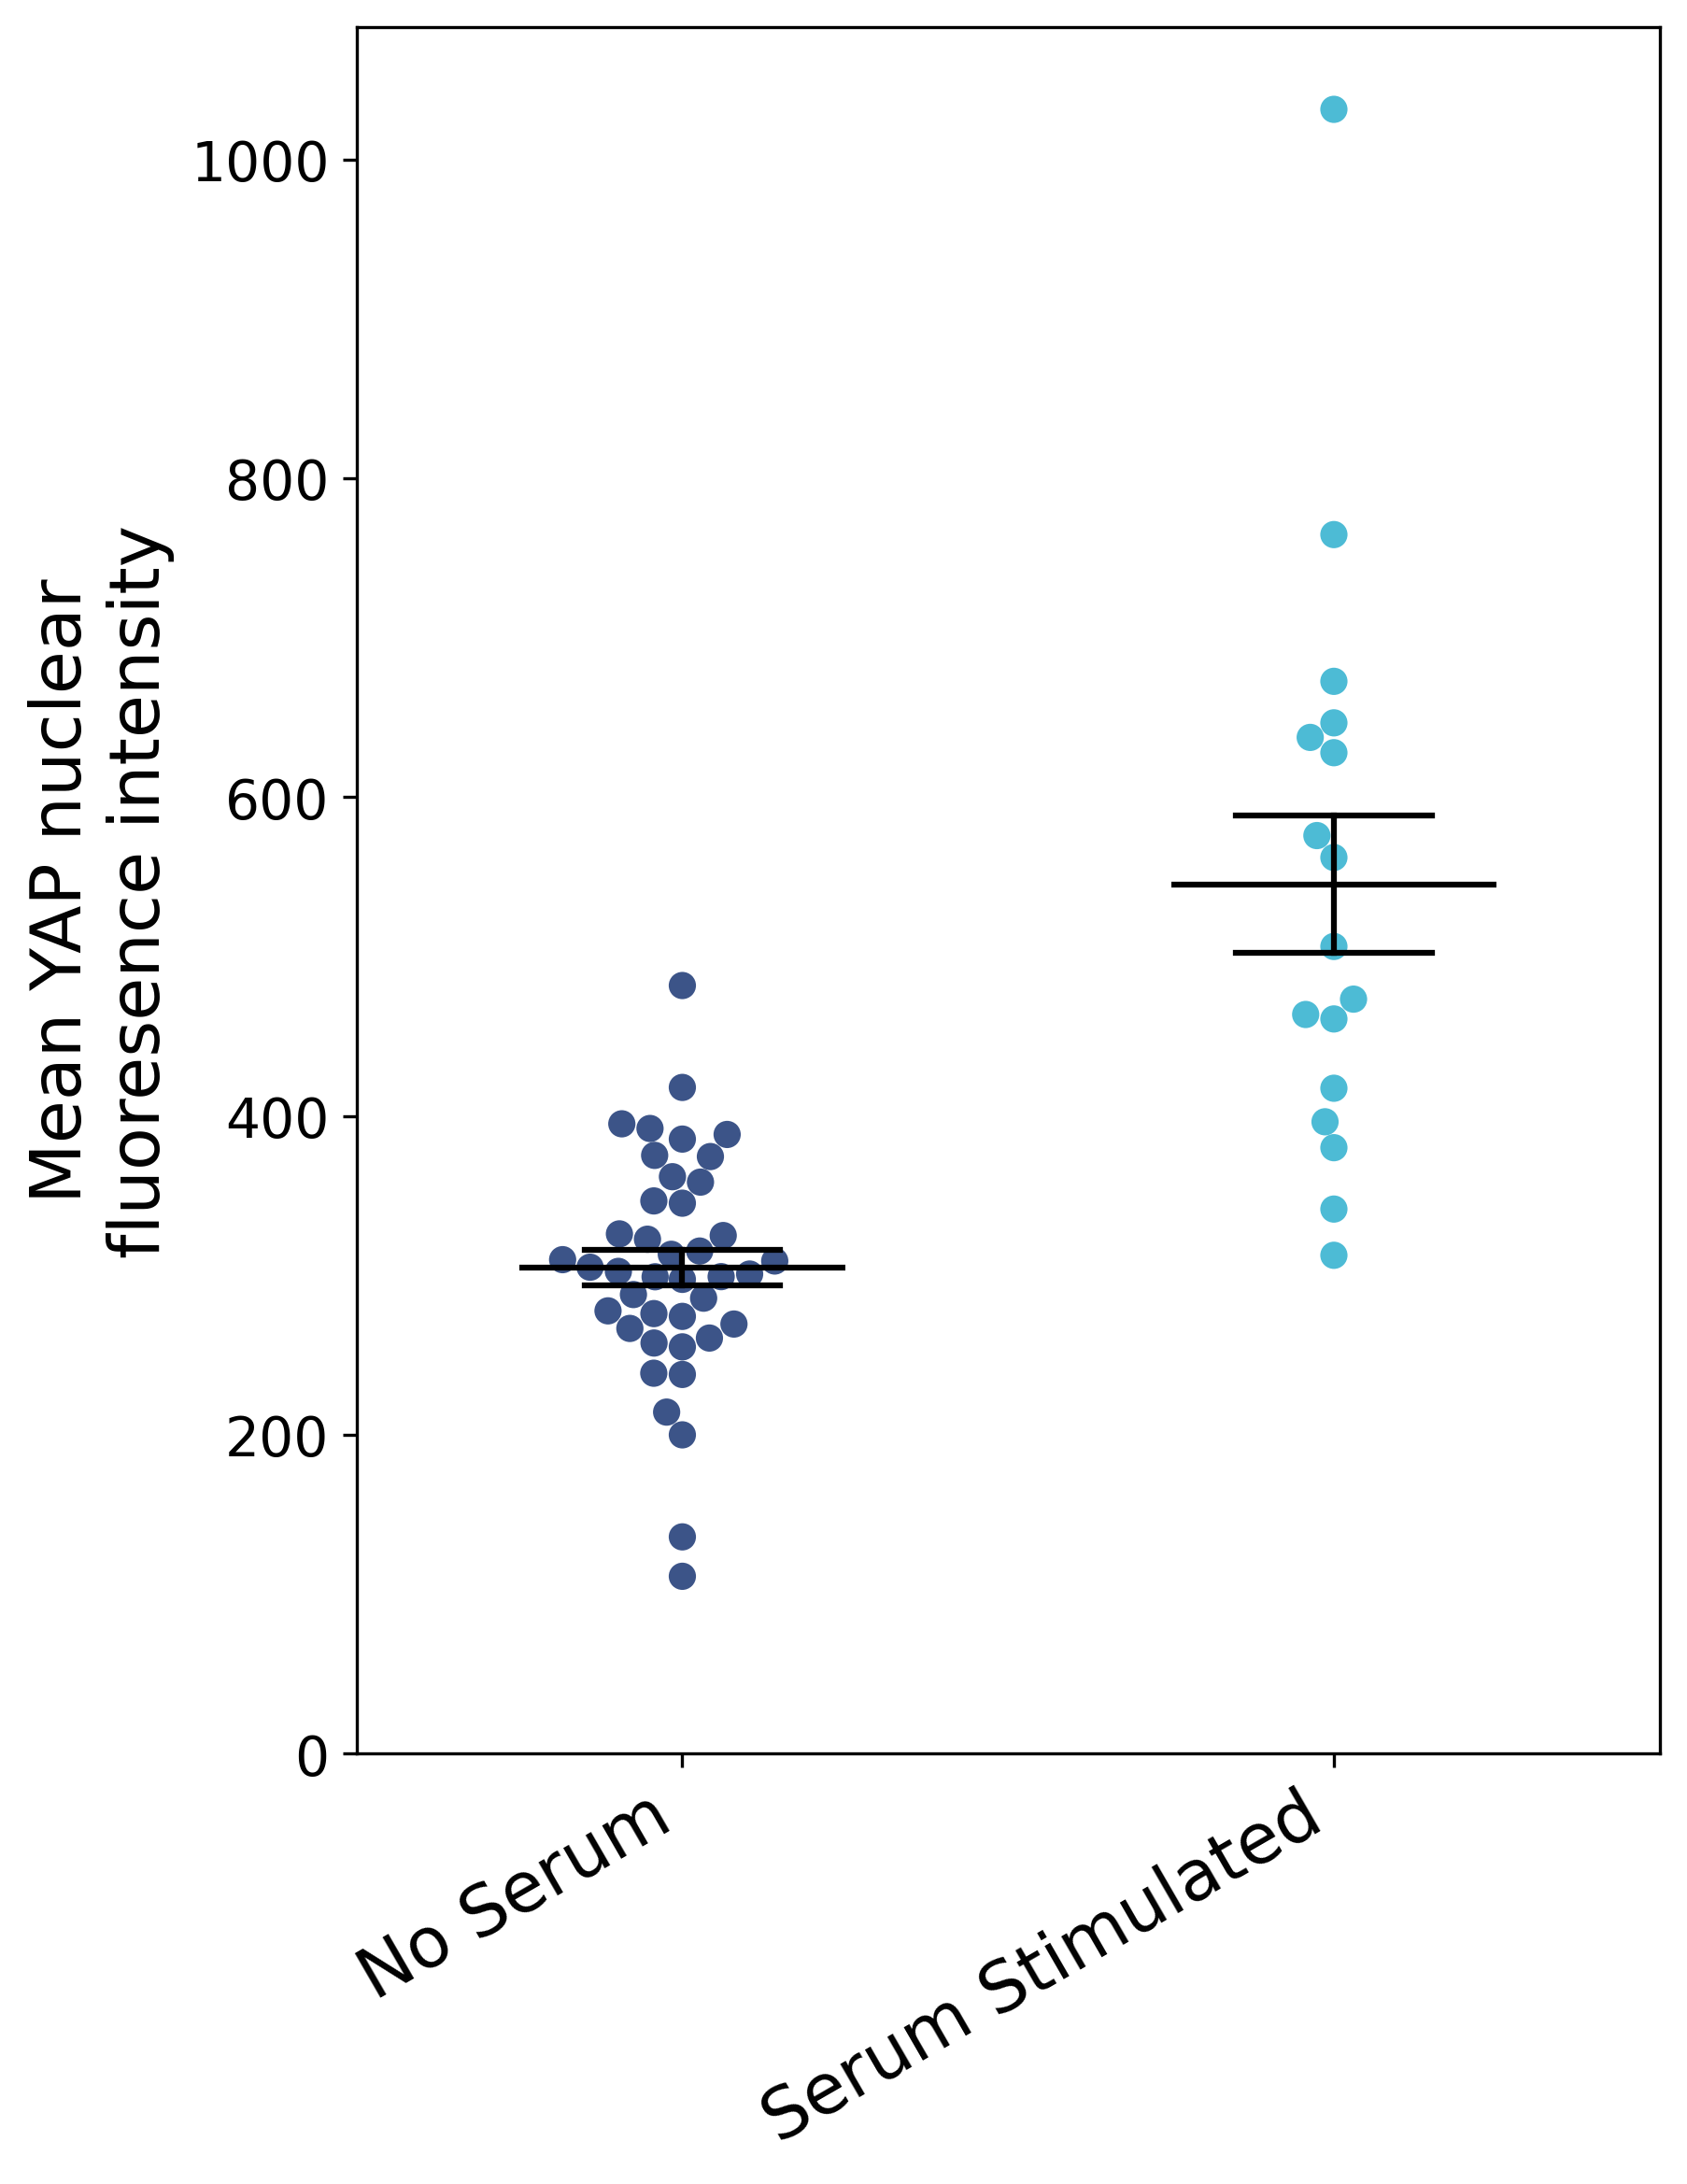

In [59]:
fig, ax = plt.subplots()

Color_code = ['#3C5488', '#4DBBD5']

sns.swarmplot(
    data=full_results,
    s=7,
    palette=Color_code,
    zorder=0
)

sns.barplot(
    data=full_results,
    estimator=np.mean,
    alpha=0,
    errorbar='se',
    capsize=.3,
    err_kws={'linewidth': 1.5, 'color': 'black'}
)

sns.boxplot(
    data=full_results,
    showmeans=True,
    meanline=True,
    width=.5,
    meanprops = {'color': 'black', 'ls': '-', 'lw': 1.5},
    medianprops = {'visible': False},
    whiskerprops = {'visible': False},
    showfliers=False,
    showbox=False,
    showcaps=False
)

ax.set_ylabel('Mean YAP nuclear\nfluoresence intensity', fontsize=18)
ax.set_xticks([0,1], labels=['No Serum', 'Serum Stimulated'])
plt.xticks(rotation=30, ha='right', fontsize=18)
plt.yticks(fontsize=14)

fig.set_dpi(300)
fig.set_size_inches(6, 8)

plt.show()

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #4: Annotate plot</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

With our data analyzed and plotted, we can annotate our plot in order to show the results of our statistical analysis. Our annotations can be additional objects that we overlay on top of our plot, allowing us to provide information common to published figures.

<h2>Add lines</h2>

For example, let's draw a simple line on our plot by defining a set of x values and a set of y values, and then plotting those two points as a red line.
```
x1, x2 = 0, 1
y1, y2 = 200, 300

plt.plot([x1, x2], [y1, y2], lw=1.5, c='red')
```

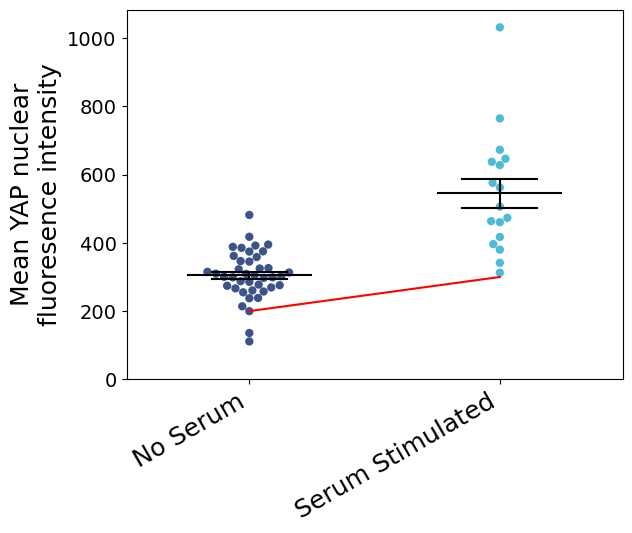

In [64]:
fig, ax = plt.subplots()

Color_code = ['#3C5488', '#4DBBD5']

sns.swarmplot(
    data=full_results,
    s=6,
    palette=Color_code,
    zorder=0
)

sns.barplot(
    data=full_results,
    estimator=np.mean,
    alpha=0,
    errorbar='se',
    capsize=.3,
    err_kws={'linewidth': 1.5, 'color': 'black'}
)

sns.boxplot(
    data=full_results,
    showmeans=True,
    meanline=True,
    width=.5,
    meanprops = {'color': 'black', 'ls': '-', 'lw': 1.5},
    medianprops = {'visible': False},
    whiskerprops = {'visible': False},
    showfliers=False,
    showbox=False,
    showcaps=False
)

ax.set_ylabel('Mean YAP nuclear\nfluoresence intensity', fontsize=18)
ax.set_xticks([0,1], labels=['No Serum', 'Serum Stimulated'])
plt.xticks(rotation=30, ha='right', fontsize=18)
plt.yticks(fontsize=14)

x1, x2 = 0, 1
y1, y2 = 200, 300
plt.plot([x1, x2], [y1, y2], lw=1.5, c='red')

#fig.set_dpi(300)
#fig.set_size_inches(6, 8)

plt.show()

Now let's create a line higher than the max value of our data.
```
x1, x2 = 0, 1
y = full_results.max().max() + 0.1*full_results.max().max()

plt.plot([x1, x2], [y, y], lw=1.5, c='red'
``` 

In [66]:
full_results.max().max()

1031.4822359843547

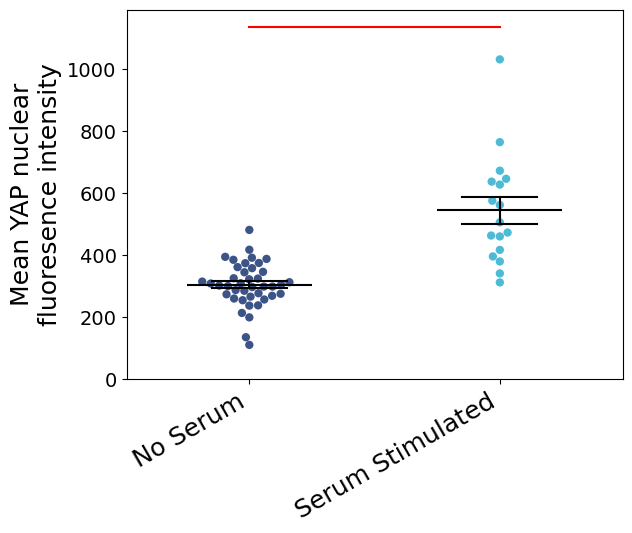

In [67]:
fig, ax = plt.subplots()

Color_code = ['#3C5488', '#4DBBD5']

sns.swarmplot(
    data=full_results,
    s=6,
    palette=Color_code,
    zorder=0
)

sns.barplot(
    data=full_results,
    estimator=np.mean,
    alpha=0,
    errorbar='se',
    capsize=.3,
    err_kws={'linewidth': 1.5, 'color': 'black'}
)

sns.boxplot(
    data=full_results,
    showmeans=True,
    meanline=True,
    width=.5,
    meanprops = {'color': 'black', 'ls': '-', 'lw': 1.5},
    medianprops = {'visible': False},
    whiskerprops = {'visible': False},
    showfliers=False,
    showbox=False,
    showcaps=False
)

ax.set_ylabel('Mean YAP nuclear\nfluoresence intensity', fontsize=18)
ax.set_xticks([0,1], labels=['No Serum', 'Serum Stimulated'])
plt.xticks(rotation=30, ha='right', fontsize=18)
plt.yticks(fontsize=14)

x1, x2 = 0, 1
y = full_results.max().max() + 0.1*full_results.max().max()
plt.plot([x1, x2], [y, y], lw=1.5, c='red')

#fig.set_dpi(300)
#fig.set_size_inches(6, 8)

plt.show()

Now let's plot a bracket shape instead and change the color to black. A bracket is essentially just for points connected by lines, so let's define the four points to be plotted.
```
x1, x2 = 0, 1
y, height = full_results.max().max() + 0.1*full_results.max().max() , 0.05*full_results.max().max()

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='k')
```

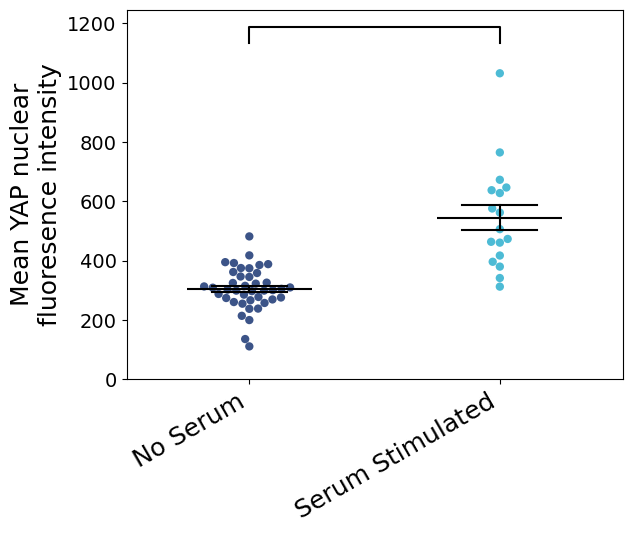

In [69]:
fig, ax = plt.subplots()

Color_code = ['#3C5488', '#4DBBD5']

sns.swarmplot(
    data=full_results,
    s=6,
    palette=Color_code,
    zorder=0
)

sns.barplot(
    data=full_results,
    estimator=np.mean,
    alpha=0,
    errorbar='se',
    capsize=.3,
    err_kws={'linewidth': 1.5, 'color': 'black'}
)

sns.boxplot(
    data=full_results,
    showmeans=True,
    meanline=True,
    width=.5,
    meanprops = {'color': 'black', 'ls': '-', 'lw': 1.5},
    medianprops = {'visible': False},
    whiskerprops = {'visible': False},
    showfliers=False,
    showbox=False,
    showcaps=False
)

ax.set_ylabel('Mean YAP nuclear\nfluoresence intensity', fontsize=18)
ax.set_xticks([0,1], labels=['No Serum', 'Serum Stimulated'])
plt.xticks(rotation=30, ha='right', fontsize=18)
plt.yticks(fontsize=14)

x1, x2 = 0, 1
y, height = full_results.max().max() + 0.1*full_results.max().max(), 0.05*full_results.max().max()
plt.plot([x1, x1, x2, x2], [y, y+height, y+height, y], lw=1.5, c='black')

#fig.set_dpi(300)
#fig.set_size_inches(6, 8)

plt.show()

<h2>Add text</h2>

We can also add text to our plots as well by making use of the <mark style="background-color: #EEEEEE;"><strong>plt.text()</strong></mark> function. <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html" rel="noopener noreferrer" target="_blank"><u>Documentation is here.</u></a> Using the same x and y values that we defined before, we can tell Python where we want the text to appear on our plot.
```
plt.plot((x1+x2)*0.5, y+height, '***', ha='center', va='bottom', color='k', size=12)
```

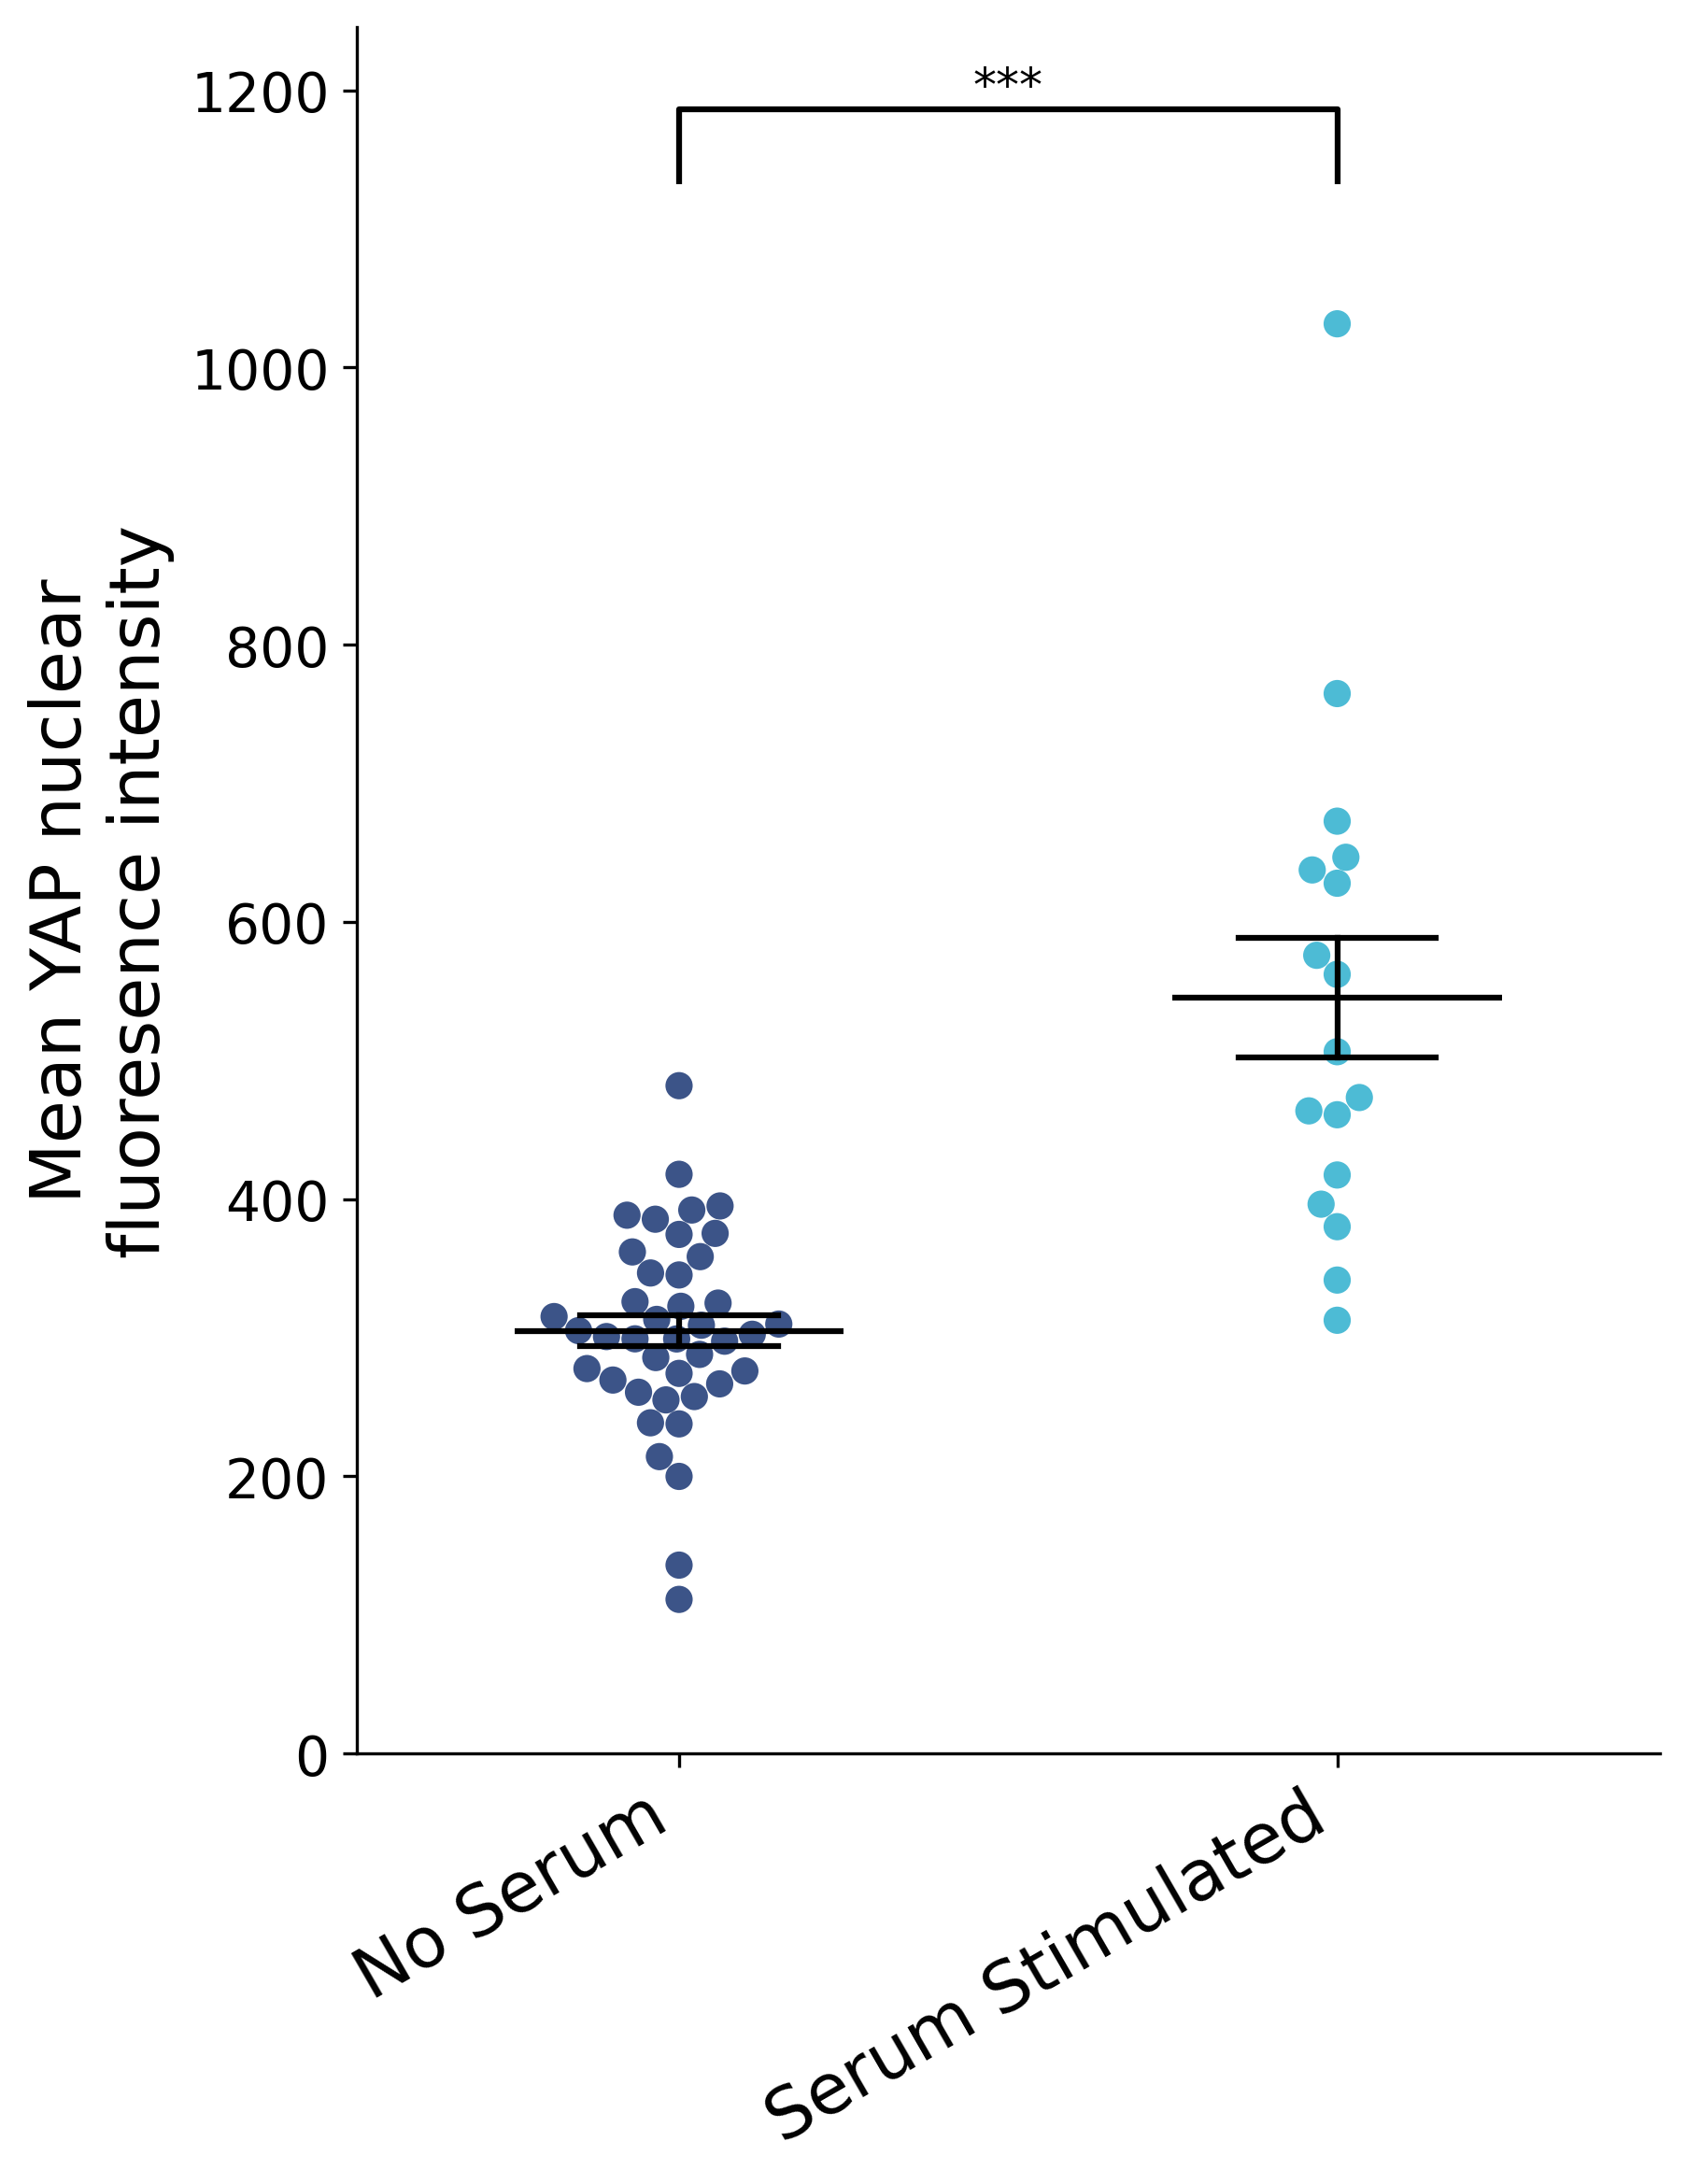

In [71]:
fig, ax = plt.subplots()

Color_code = ['#3C5488', '#4DBBD5']

sns.swarmplot(
    data=full_results,
    s=7,
    palette=Color_code,
    zorder=0
)

sns.barplot(
    data=full_results,
    estimator=np.mean,
    alpha=0,
    errorbar='se',
    capsize=.3,
    err_kws={'linewidth': 1.5, 'color': 'black'}
)

sns.boxplot(
    data=full_results,
    showmeans=True,
    meanline=True,
    width=.5,
    meanprops = {'color': 'black', 'ls': '-', 'lw': 1.5},
    medianprops = {'visible': False},
    whiskerprops = {'visible': False},
    showfliers=False,
    showbox=False,
    showcaps=False
)

ax.set_ylabel('Mean YAP nuclear\nfluoresence intensity', fontsize=18)
ax.set_xticks([0,1], labels=['No Serum', 'Serum Stimulated'])
plt.xticks(rotation=30, ha='right', fontsize=18)
plt.yticks(fontsize=14)

x1, x2 = 0, 1
y, height = full_results.max().max() + 0.1*full_results.max().max(), 0.05*full_results.max().max()
plt.plot([x1, x1, x2, x2], [y, y+height, y+height, y], lw=1.5, c='black')
plt.text((x1 + x2)*0.5, y+height, '***', ha='center', va='bottom', size=12, color='k')

fig.set_dpi(300)
fig.set_size_inches(6, 8)

sns.despine()
plt.show()

In [72]:
fig.savefig('MDAMB231_serum_starv_vs_serum_stim.pdf', bbox_inches='tight')

In [73]:
os.getcwd()

'/home/jovyan/MCB201B_F2024/Week_5/images'